importing the libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

FIRSTLY WE CALCULATE THE DISTANCE BY USING EUCLIDEAN DISTANCE BY TAKING TWO INSTANCES X1, X2 IN MULTIDIMENSIONAL SPACE

In [23]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

AS THE NAME SUGGESTS K NEAREST NEIGHBOURS WE HAVE TO TAKE ONLY ONE TEST INSTANCE AND REMAINING ALL ARE TRAINING INSTANCES AND CALCULATE THE DISTANCE BETWEEN THEM AND SELECT THE SHORTEST DISTANCE POINTS.
AND MAKE PREDICTIONS THEN ASSIGN THE CLASS LABELS AS PER THE PREDICTED LABEL

In [24]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_pred = [self._predict(x) for x in x_test]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.x_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common

LOADING THE DATASET

In [25]:
data = pd.read_csv('/content/train_fsm.csv')

NOW DATA PREPROCESSING WE HAVE TO REMOVE THW UNNECESSARY AND MISSING VALUES ROWS AND COLUMNS AND CONVERT THE CATEGORICAL VARIABLES INTO NUMERICAL VALUES

In [26]:
data.drop(["Name", "Ticket", "Cabin", "Embarked","PassengerId","SibSp","Parch"], axis=1, inplace=True)
data.dropna(inplace=True)
data["Sex"] = data["Sex"].map({"female": 0, "male": 1})

SPLITTING UP THE LABELS AND FEATURES INTO TRAINING AND TESTING SET.WE NORMALIZE THE FEATURES AND SPLIT THE DATASET INTO THE SETS.

In [27]:
x = data.drop("Pclass", axis=1).values
y = data["Pclass"].values
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

WE CREATE A KNN CLASSIFIER INSTANCE AND WE GIVE VALUE FOR K, FIT THE TRAINING THE DATA. WE MAKE PREDICTIONS

In [28]:
knn = KNN(k=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

CALCULATING THE ACCURACY

In [29]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7412587412587412


VISUALIZING THE RESULTS

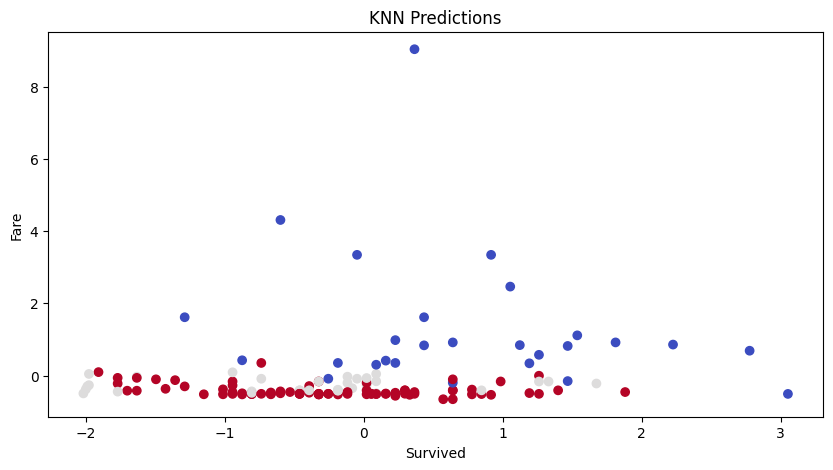

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(x_test[:, 2], x_test[:, 3], c=y_pred, cmap="coolwarm")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("KNN Predictions")
plt.show()

NOW PLOTTING THE ACCURACY RESULTS BECAUSE WE HAVE SO MANY LABELS AND BY VISUALIZING WE CAN UNDERSTAND EASILY

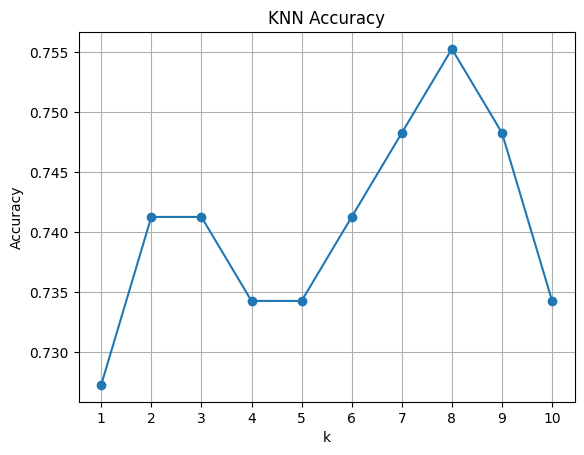

In [31]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn.k = k
    y_pred = knn.predict(x_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)

# Plot the accuracy values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()